In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, classification_report, ConfusionMatrixDisplay,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("predict_students_dropout_and_academic_success.csv",delimiter=";")
le = LabelEncoder()
df["Target"] = le.fit_transform(df["Target"])
rfc = RandomForestClassifier(n_estimators=5400)
x_train, x_test, y_train, y_test = train_test_split(df.iloc[::-1],df["Target"],train_size=0.2,random_state=42)
rfc.fit(X=x_train,y=y_train)


RandomForestClassifier(n_estimators=5400)

Accuracy:  0.4732
Precision: 0.3975
Recall:    0.4732
F1 Score:  0.3698
Log Loss:  1.0505


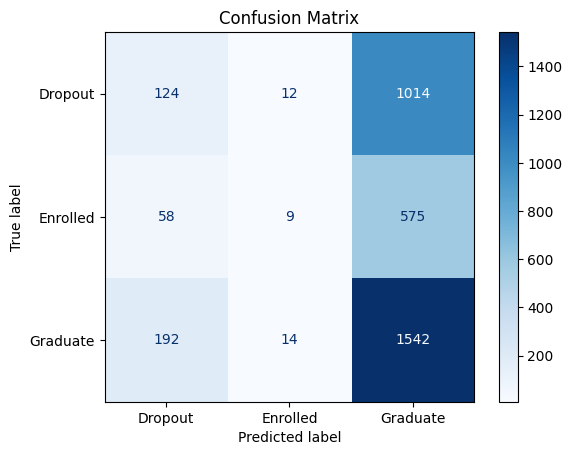


Classification Report (per-class precision, recall, F1):
              precision    recall  f1-score   support

     Dropout     0.3316    0.1078    0.1627      1150
    Enrolled     0.2571    0.0140    0.0266       642
    Graduate     0.4925    0.8822    0.6321      1748

    accuracy                         0.4732      3540
   macro avg     0.3604    0.3347    0.2738      3540
weighted avg     0.3975    0.4732    0.3698      3540



In [32]:
y_pred = rfc.predict(X=x_test)
y_pred_proba = rfc.predict_proba(X=x_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,average="weighted")
rec = recall_score(y_test, y_pred,average="weighted")
f1 = f1_score(y_test, y_pred,average="weighted")
loss = log_loss(y_test, y_pred_proba)
# Output
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Log Loss:  {loss:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(rfc.classes_))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Per-class precision, recall, F1-score

print("\nClassification Report (per-class precision, recall, F1):")
# Inverse transform encoded labels back to original
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Generate report using original class labels
print(classification_report(y_test_labels, y_pred_labels, digits=4))